# Random Forest

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.26.4
sklearn version: 1.1.3
Python version: 3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


### Import data

In [2]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [3]:
print(players_all['winner'].value_counts(normalize=True))

winner
True     0.501909
False    0.498091
Name: proportion, dtype: float64


In [4]:

players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])


# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])


In [5]:
players_all.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,26.72,83.53,16.47,75.83,24.17,31.88,28.71,39.66,28.51,False
1,1410.0,474841.0,41.74,122.11,208.83,248.88,115.01,8.80,5.41,30.0,...,24.45,79.52,20.48,67.56,32.44,31.06,36.93,31.49,32.85,False
2,1355.0,465999.0,35.87,119.38,223.64,212.03,145.07,21.79,7.24,36.0,...,26.17,80.77,19.23,67.72,32.28,37.22,32.79,27.29,38.78,False
3,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,29.87,54.02,45.98,77.37,22.63,28.14,44.34,41.22,29.30,True
4,1518.0,521069.0,50.22,149.49,179.09,241.24,128.04,9.51,3.34,32.0,...,35.38,61.49,38.51,79.66,20.34,29.56,30.44,30.15,34.75,True


In [6]:
teams_all.head()

,movement_avg_speed_1,movement_total_distance_1,movement_time_supersonic_speed_1,movement_time_boost_speed_1,movement_time_slow_speed_1,movement_time_ground_1,movement_time_low_air_1,movement_time_high_air_1,movement_time_powerslide_1,movement_count_powerslide_1,...,avg_positioning_time_most_back,max_movement_percent_high_air,min_movement_percent_high_air,var_movement_percent_high_air,avg_movement_percent_high_air,max_movement_percent_supersonic_speed,min_movement_percent_supersonic_speed,var_movement_percent_supersonic_speed,avg_movement_percent_supersonic_speed,winner
0,1468.0,505882.0,40.34,142.29,196.16,219.80,143.43,15.56,8.01,68.0,...,117.70,5.75,2.36,1.92,4.07,11.20,9.47,0.52,10.44,False
1,1455.0,500485.0,41.75,130.76,206.38,231.33,123.58,23.97,5.61,49.0,...,119.37,6.33,0.66,5.57,3.17,13.26,6.27,8.49,10.18,True
2,1430.0,561540.0,50.30,150.27,216.30,217.17,177.03,22.67,11.74,103.0,...,132.60,5.44,3.86,0.45,4.78,14.12,7.32,8.11,11.17,True
3,1559.0,609572.0,66.07,166.44,181.22,237.20,165.62,10.91,11.98,120.0,...,133.23,5.50,2.64,1.37,4.14,15.97,7.48,12.22,11.40,False
4,1486.0,486636.0,27.96,145.74,177.11,218.76,123.81,8.24,7.00,62.0,...,114.97,6.45,1.25,5.01,3.35,11.70,7.29,3.76,8.99,False


### X,y division

In [7]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]
X_small_file = small_file.iloc[:, 0:44]

In [8]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]
y_small_file = small_file.iloc[:, 44]

In [9]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [10]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Train-test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_players_ranked, y_players_ranked, random_state=20, test_size=0.2)

# Model 1 -----------------------------------------------

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# random forests model
rf = RandomForestClassifier(n_estimators=500,
                             min_samples_split=10)

In [16]:
#40 sec voor individueel / 55 sec voor teams / nu 7 min met extra HP

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=500)

## Scores

In [18]:
y_pred = rf.predict(X_test)

In [19]:
rf.score(X_test, y_test)

0.7255930327671655

### F1 enzoo metrics

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.72      0.72      0.72     10337
        True       0.73      0.73      0.73     10446

    accuracy                           0.73     20783
   macro avg       0.73      0.73      0.73     20783
weighted avg       0.73      0.73      0.73     20783



In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [23]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7255930327671655
recall 0.7272640245069883
precision 0.7269160845852072
f1 0.727090012920515


## Conf matrix

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
print(confusion_matrix(y_test, y_pred))

[[7483 2854]
 [2849 7597]]


[[7483 2854]
 [2849 7597]]
0.7255930327671655


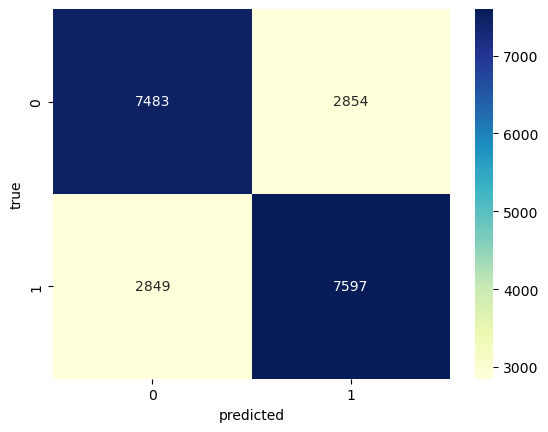

In [26]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()

## ROC curve

[0.52806401 0.60891173 0.51396343 0.85142801 0.70463107 0.32966589
 0.83201901 0.48929123 0.79772373 0.90485269 0.68908733 0.7519357
 0.30148432 0.55972443 0.09910628 0.17430051 0.93949129 0.67866693
 0.37636731 0.48769245 0.10740818 0.41063406 0.39681468 0.42469054
 0.70777952 0.50627362 0.40738243 0.21072341 0.45051283 0.7734497
 0.8652959  0.62571748 0.32476703 0.42008292 0.66987201 0.49752281
 0.67926201 0.21036662 0.39618859 0.44647318 0.10033501 0.93187374
 0.34256686 0.43388156 0.77873089 0.33025963 0.16577138 0.28825544
 0.75276322 0.80832333 0.7523828  0.8567743  0.45367205 0.44230149
 0.31568846 0.36544724 0.76531366 0.42169935 0.13133316 0.28402585
 0.5047214  0.13954233 0.23647026 0.62838982 0.49951168 0.20465766
 0.67619078 0.82753183 0.46091532 0.7203581  0.50044287 0.80713056
 0.42201629 0.11660724 0.8242925  0.40784285 0.78098857 0.63990048
 0.46406686 0.28368291 0.68765822 0.434658   0.30933541 0.881618
 0.11148741 0.85124329 0.72306256 0.60951962 0.4324888  0.85472879

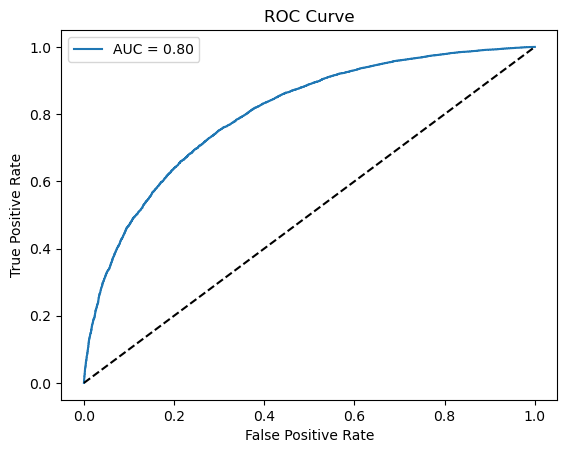

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Imporant features

In [28]:
features = pd.DataFrame(rf.feature_importances_, index = X_train.columns)

In [29]:
features.sort_values(0, ascending=False)

,0
positioning_percent_infront_ball,0.070898
positioning_percent_behind_ball,0.070395
positioning_time_infront_ball,0.056417
positioning_percent_most_forward,0.035168
positioning_time_behind_ball,0.033726
positioning_time_most_forward,0.030913
positioning_percent_most_back,0.028081
positioning_time_most_back,0.026448
positioning_avg_distance_to_ball_possession,0.025233
positioning_percent_offensive_third,0.023483


In [30]:
correlations = pd.DataFrame(X_train.corrwith(y_train))
correlations.sort_values(0, ascending=False)

,0
positioning_percent_behind_ball,0.325873
positioning_time_behind_ball,0.132656
positioning_percent_offensive_half,0.118608
positioning_percent_offensive_third,0.112674
positioning_avg_distance_to_ball_possession,0.105484
positioning_time_offensive_third,0.098042
positioning_time_offensive_half,0.093598
positioning_avg_distance_to_mates,0.078678
positioning_avg_distance_to_ball,0.077440
positioning_percent_neutral_third,0.050002


## statistics

In [31]:
# average for winners and average for losers
X_train['positioning_percent_behind_ball'].groupby(y_train).mean()


winner
False    69.810504
True     73.176076
Name: positioning_percent_behind_ball, dtype: float64

In [32]:
# average for winners and average for losers
X_train['positioning_percent_infront_ball'].groupby(y_train).mean()

winner
False    30.189496
True     26.823922
Name: positioning_percent_infront_ball, dtype: float64

In [33]:
# average for winners and average for losers
X_train['positioning_percent_offensive_half'].groupby(y_train).mean()

winner
False    34.222698
True     35.792685
Name: positioning_percent_offensive_half, dtype: float64

In [34]:
# average for winners and average for losers
X_train['positioning_percent_defensive_half'].groupby(y_train).mean()

winner
False    65.777301
True     64.207315
Name: positioning_percent_defensive_half, dtype: float64

# Model 2 -------------------------------

## Model

In [35]:
rf2 = RandomForestClassifier(n_estimators=500,
                             criterion='entropy',
                             min_samples_split=10,
                             max_depth = 14,
                             random_state = 42
)

In [36]:
#13 min de volgende / 8 min voor team / 2 op blauwe laptop

In [37]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=500, random_state=42)

## Scores

In [38]:
y_pred2 = rf2.predict(X_test)

In [39]:
rf2.score(X_test, y_test)

0.709810903141991

In [40]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.71      0.71      0.71     10337
        True       0.71      0.71      0.71     10446

    accuracy                           0.71     20783
   macro avg       0.71      0.71      0.71     20783
weighted avg       0.71      0.71      0.71     20783



In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [42]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.709810903141991
recall 0.7099368179207353
precision 0.7119132187769991
f1 0.7109236447299047


In [43]:
from sklearn.metrics import accuracy_score

In [44]:
y_pred2 = rf2.predict(X_test)
y_pred_classes2 = y_pred2
y_test_classes2 = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes2, y_pred_classes2))

DNN Accuracy: 0.709810903141991


### Conf matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
print(confusion_matrix(y_test, y_pred2))

[[7336 3001]
 [3030 7416]]


[[7336 3001]
 [3030 7416]]
0.709810903141991


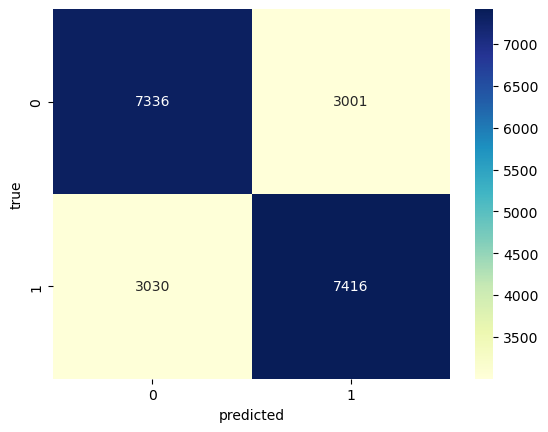

In [47]:
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


### roc score

[0.4747971  0.61133289 0.51236751 0.804349   0.73761971 0.28801762
 0.85993428 0.49024564 0.81820724 0.81310221 0.78521933 0.77806214
 0.32316682 0.65738306 0.10454841 0.14217412 0.91433002 0.71662216
 0.39143427 0.48968963 0.08754846 0.41835644 0.31394133 0.37982387
 0.60322367 0.53879367 0.39731652 0.41948801 0.48451586 0.79813086
 0.76926202 0.61215927 0.28075178 0.44594566 0.69184604 0.55395094
 0.66093837 0.21459731 0.43961227 0.48430077 0.12224077 0.90323609
 0.30404488 0.46263008 0.73457837 0.3448156  0.18682575 0.2317234
 0.66247107 0.81444593 0.77986341 0.83027588 0.49833353 0.39177635
 0.32588474 0.51061518 0.74980079 0.39026107 0.11721403 0.26812443
 0.4755439  0.14562723 0.14174461 0.67795049 0.44564598 0.18283939
 0.67022086 0.90917921 0.41131401 0.66507286 0.57130022 0.7893795
 0.40181866 0.13629767 0.81843498 0.35203043 0.82412264 0.59754044
 0.40111765 0.27744648 0.67418079 0.38662809 0.27917726 0.82177203
 0.31665924 0.86567724 0.76953811 0.54841233 0.46000616 0.827205

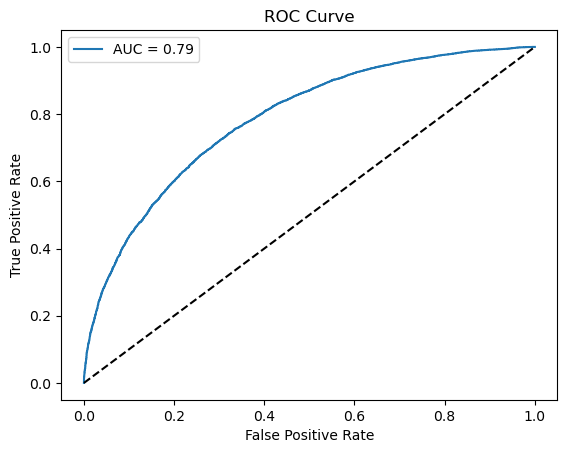

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Important features

In [51]:
features = pd.DataFrame(rf2.feature_importances_, index = X_train.columns)

In [52]:
features.sort_values(0, ascending=False)

,0
positioning_percent_behind_ball,0.096607
positioning_percent_infront_ball,0.095213
positioning_time_infront_ball,0.070202
positioning_time_behind_ball,0.040858
positioning_percent_most_forward,0.040343
positioning_time_most_forward,0.036160
positioning_percent_most_back,0.029443
positioning_time_most_back,0.028856
positioning_avg_distance_to_ball_possession,0.024158
positioning_percent_offensive_third,0.023354
